In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
strip_first = lambda x: int(str(x)[0])
strip_first_vec = np.vectorize(strip_first)

In [2]:
# Retrieve precinct-level for Campbell County, WY here
# https://sos.wyo.gov/Elections/Docs/2020/Results/General/2020_Campbell_County_General_PbP.pdf

# I manually converted the PDF to a CSV

header = ['Trump', 'Biden', 'Jorgensen']
df = pd.read_csv('campbell-2020.csv', header=1, index_col=0)

df.columns = header

df

FileNotFoundError: [Errno 2] File laramie.csv does not exist: 'laramie.csv'

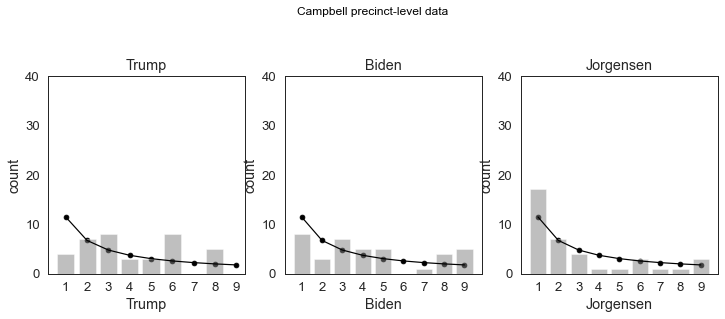

In [4]:
def plot_benford(who, df,ymax=40):
    sns.countplot(x=df[who].apply(strip_first), color='grey',
              order = [1,2,3,4,5,6,7,8,9],
              alpha=.5)
    plt.scatter(np.arange(9),
                np.log10(1 + 1/(np.arange(9)+1))*df[who].shape[0],
               color='black')
    plt.plot(np.arange(9),
                np.log10(1 + 1/(np.arange(9)+1))*df[who].shape[0],
               color='black')
    plt.title(who)
    plt.ylim(0,ymax)

plt.figure(figsize=(12,8))
plt.suptitle('Campbell precinct-level data', y=1)
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

for idx,candidate in enumerate(header):
    plt.subplot(2,3,idx+1)
    plot_benford(candidate,df)
plt.show()